Support Vector Machine

- 가장 가까운 점 (support vector) 까지의 거리가 멀어지도록 결정 경계 (초평면)을 결정한다
(선이 아니라 면이 될 수도 있음)

- 분류해서 마진을 극대화 시킨다

- 노이즈를 기준으로 소프트 마진(어느정도 허용), 하드 마진(절대 안 됨)으로 나뉜다

In [19]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# 2진 분류를 해보려고 함

iris = load_iris()
# sepal_length, sepal_width
x = iris.data[:100, :2]

# setosa, versicolor
y = iris.target[:100]

print(x)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [21]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [22]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

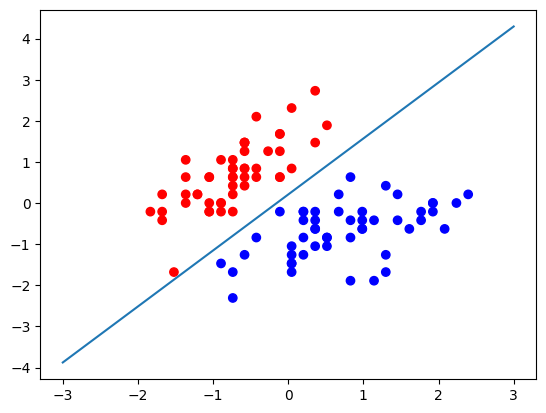

In [23]:
def hyperplane_graph(x_scale, y, svc):
    color = ["red" if c == 0 else "blue" for c in y]
    plt.scatter(x_scale[:, 0], x_scale[:, 1], color=color)

    # 초평면
    w = svc.coef_[0]
    hx = np.linspace(int(x_scale.min())-1, int(x_scale.max())+1)

    # hy = 기울기 * x - 절편
    a = -w[0] / w[1]
    hy = a * hx - (svc.intercept_[0] / w[1])
    plt.plot(hx, hy)

hyperplane_graph(x_scale, y, svc)
plt.show()


# 빨강이 세토사 / 파랑이 버지컬러
# 최대한 멀어질 수 있는 선을 그리겠다

In [24]:
# petal_length, petal_width
x = iris.data[:100, 2:4]
y = iris.target[:100]

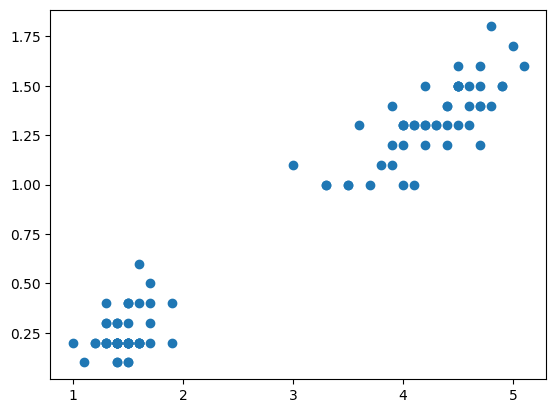

In [25]:
plt.scatter(x[:, 0], x[:,1])

In [26]:
scaler = StandardScaler()

# 모양은 같지만 범위가 달라짐
# 데이터의 단위(범위)를 맞춰주는 과정
x_scale = scaler.fit_transform(x)

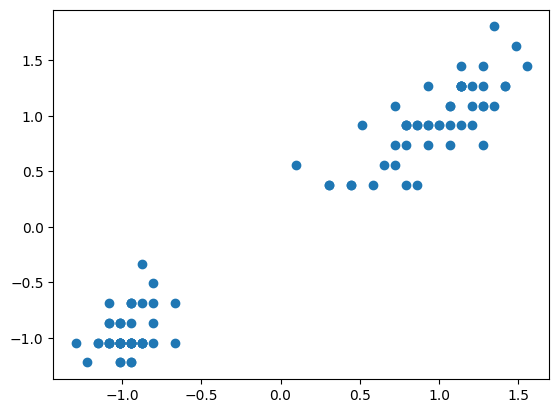

In [27]:
plt.scatter(x_scale[:, 0], x_scale[:, 1])

In [28]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

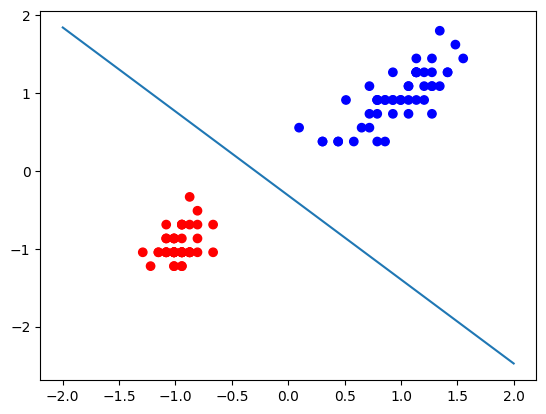

In [29]:
hyperplane_graph(x_scale, y, svc)

In [30]:
# petal_length, petal_width
x = iris.data[50:, 2:]

# versicolor, versinica
y = iris.target[50:] -1 
# 0, 1, 2로 되어있어서 지금부터는 1, 2로 되어있는데 
# 이걸 다시 0, 1로 바꿔줘야 하니까 -1을 함

In [31]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [32]:
svc = LinearSVC(dual="auto")
model = svc.fit(x_scale, y)

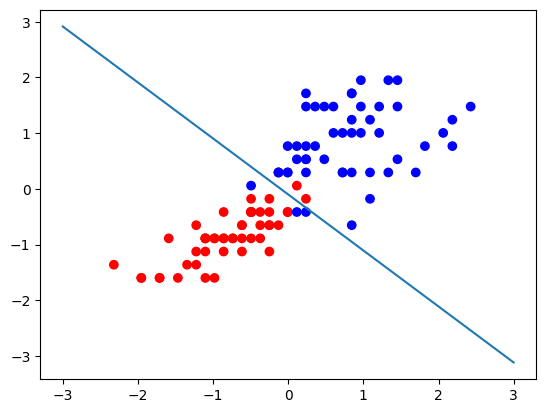

In [33]:
hyperplane_graph(x_scale, y, svc)